# Example 03: PyTtorch Data-augmentation

## データ用意(CIFAR-10)

### データ取得

In [1]:
import torch
from torchvision import transforms
from torchvision.datasets import CIFAR10
from torchvision.datasets import VisionDataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
cifar10_data = CIFAR10(root='../cache/data', train=True, download=True, transform=transforms.ToTensor())
cifar10_classes = cifar10_data.classes

In [3]:
len(cifar10_data), cifar10_classes

(50000,
 ['airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'])

### 試しに画像を表示(20枚)

In [4]:
def show_image(image_data: VisionDataset, n_images: int = 20, figsize: tuple = (9, 8)) -> None:
    cifar10_loader = DataLoader(cifar10_data, batch_size=n_images, shuffle=True)
    data_iter = iter(cifar10_loader)
    images, labels = next(data_iter)   # 最初のバッチ取得

    ncols = 5
    nrows = n_images // ncols

    plt.figure(figsize=figsize)
    for i in range(n_images):
        ax = plt.subplot(nrows, ncols, i+1)
        ax.imshow(images[i].permute(1, 2, 0))   # permuteでチャネル情報の次元を変更
        label = cifar10_classes[labels[i]]
        ax.set_title(label)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

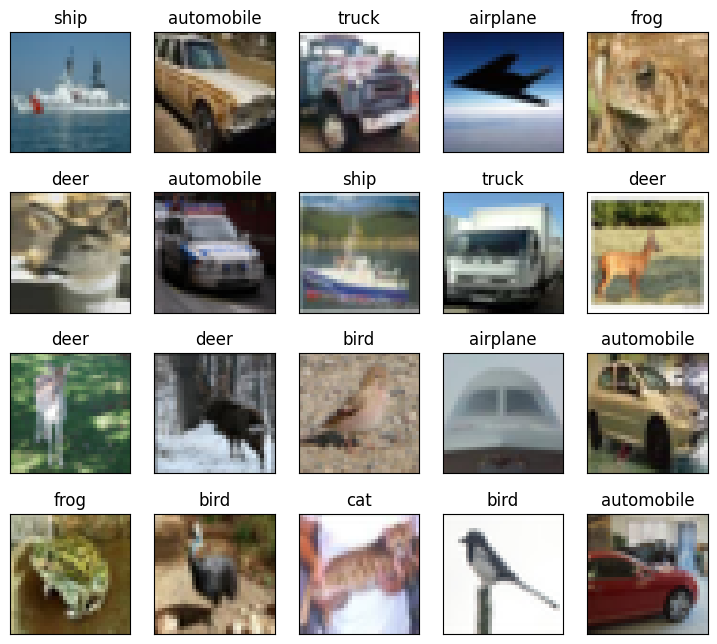

In [5]:
show_image(cifar10_data, n_images=20)

## データ拡張

### 回転とリサイズ

In [6]:
transform = transforms.Compose([
    transforms.RandomAffine((-45, 45), scale=(0.5, 1.5)),
    transforms.ToTensor()
])

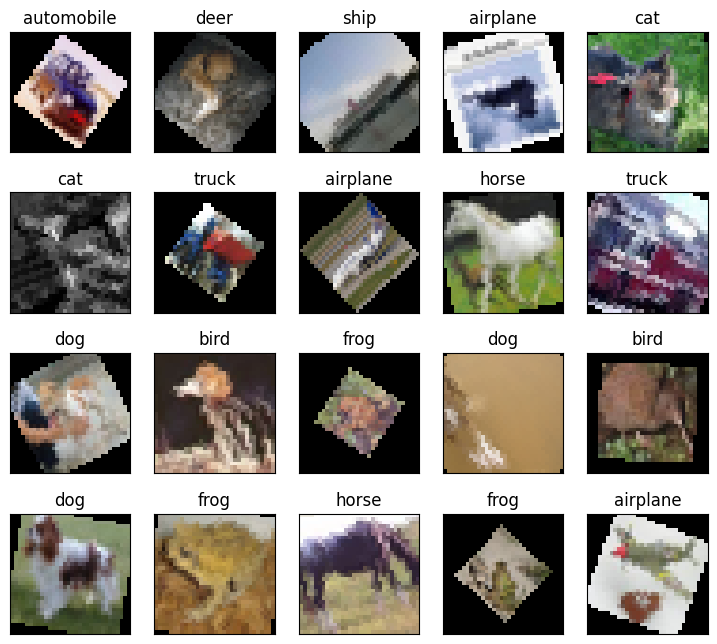

In [7]:
cifar10_data = CIFAR10(
    root='../cache/data',
    train=True,
    download=True,
    transform=transform)

show_image(cifar10_data, n_images=20)

### シフト

In [8]:
transform = transforms.Compose([
    transforms.RandomAffine((0, 0), translate=(0.5, 0.5)),  # 上下左右シフト
    transforms.ToTensor()
])

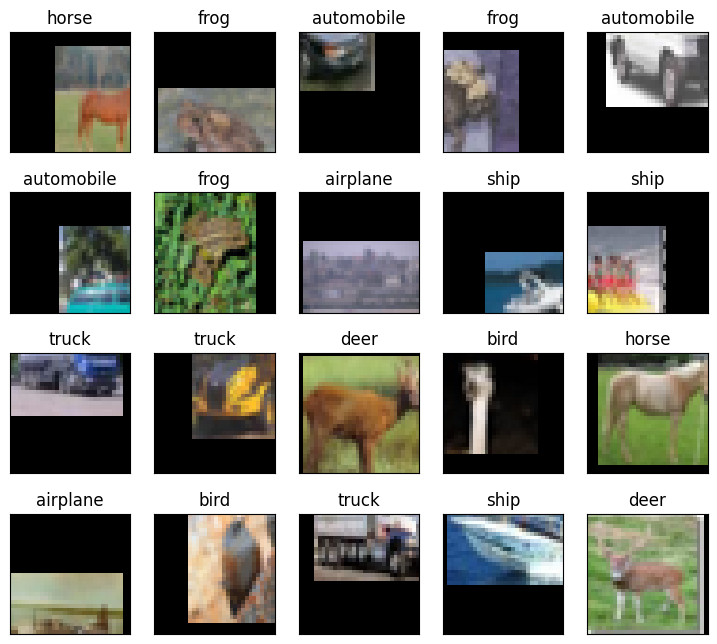

In [9]:
cifar10_data = CIFAR10(
    root='../cache/data',
    train=True,
    download=True,
    transform=transform)

show_image(cifar10_data, n_images=20)

### 反転

In [10]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5), # 水平反転(pは確率)
    transforms.RandomVerticalFlip(p=0.5),   # 垂直反転(pは確率)
    transforms.ToTensor()
])

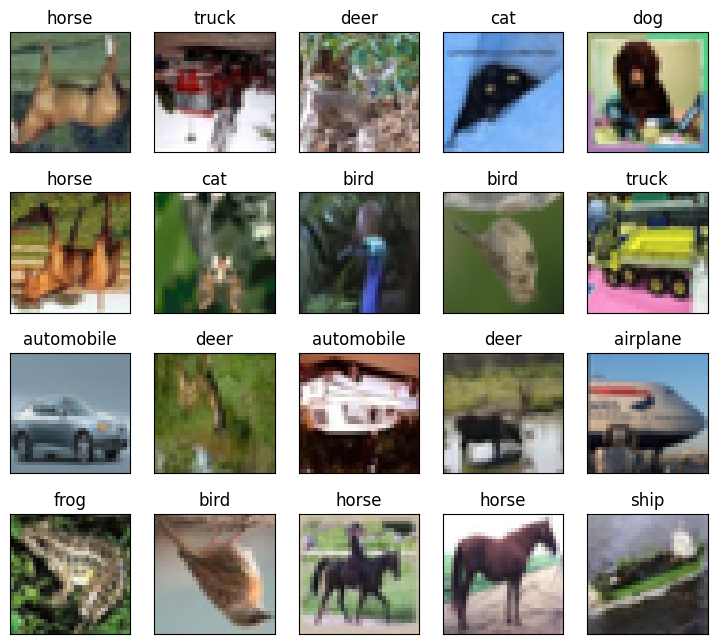

In [11]:
cifar10_data = CIFAR10(
    root='../cache/data',
    train=True,
    download=True,
    transform=transform)

show_image(cifar10_data, n_images=20)

### マスキング

In [12]:
# RandomErasingはTensorにしか適応できないため、ToTensorの後に入れる必要がある
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomErasing(p=0.5),    # pは確率
])

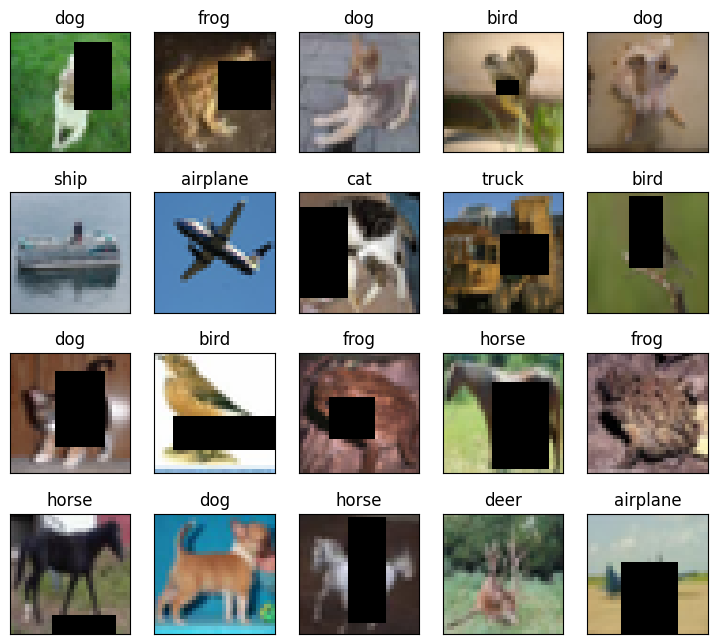

In [13]:
cifar10_data = CIFAR10(
    root='../cache/data',
    train=True,
    download=True,
    transform=transform)

show_image(cifar10_data, n_images=20)